In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('hr_data.csv')

In [4]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [5]:
df.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


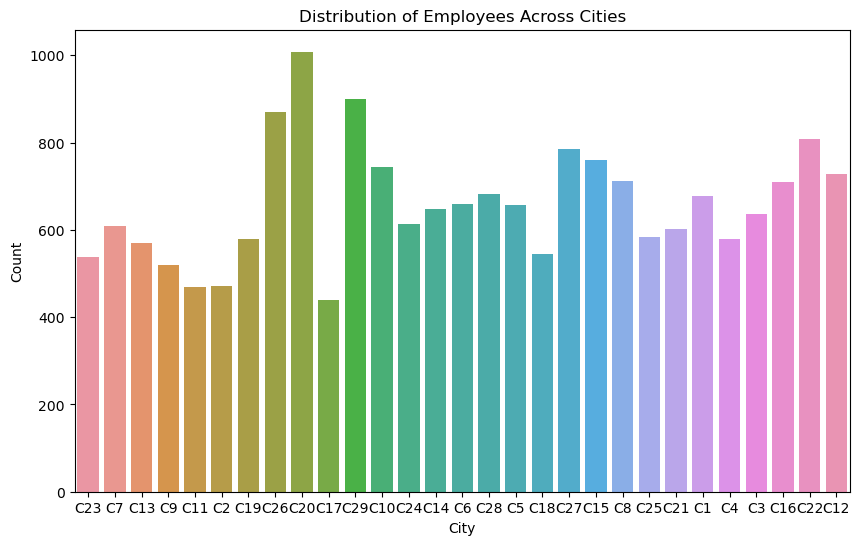

In [7]:
# Distribution of Employees Across Cities
plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=df)
plt.title('Distribution of Employees Across Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

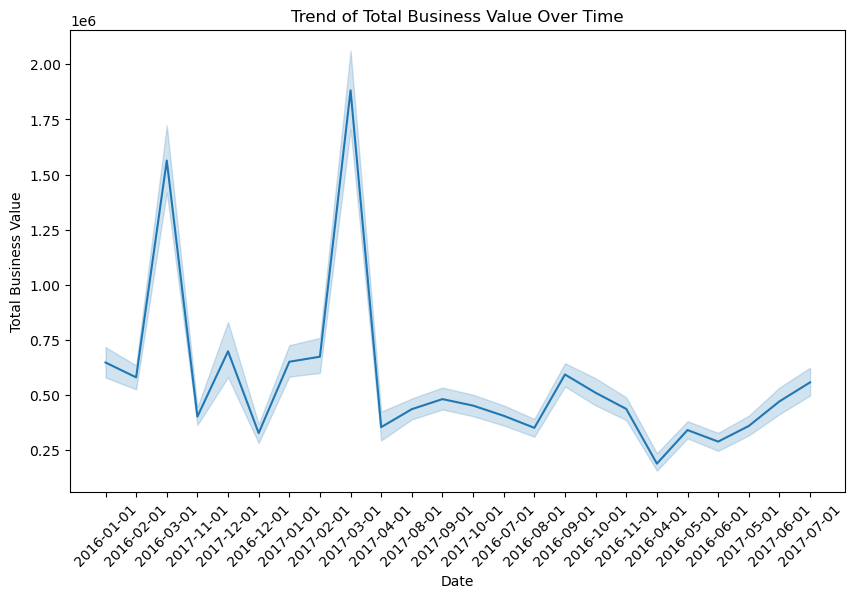

In [8]:
# Trend of Total Business Value Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='MMM-YY', y='Total Business Value', data=df)
plt.title('Trend of Total Business Value Over Time')
plt.xlabel('Date')
plt.ylabel('Total Business Value')
plt.xticks(rotation=45) 
plt.show()

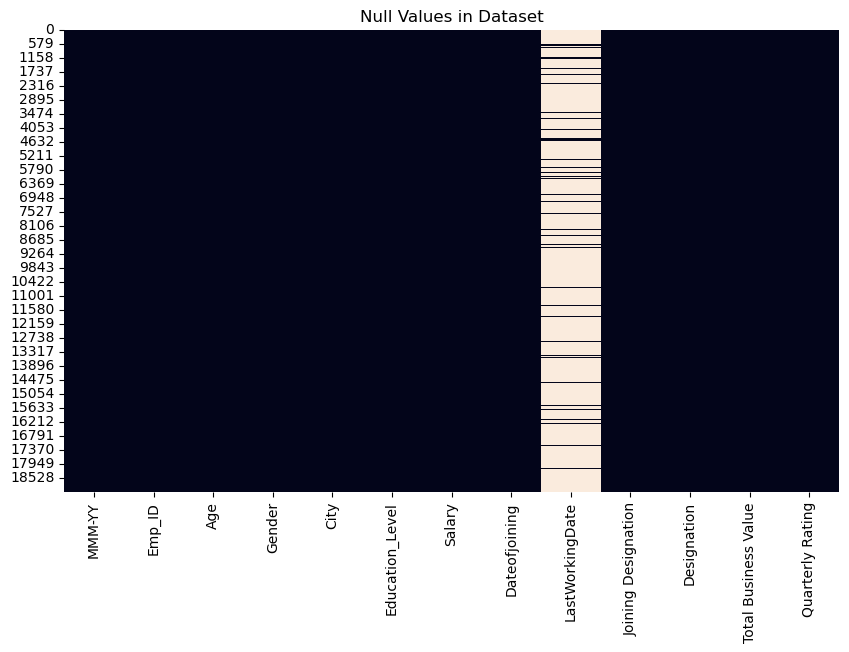

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(),  cbar=False)
plt.title('Null Values in Dataset')
plt.show()

In [11]:
from scipy.stats import zscore

z_scores = df[numerical_cols].apply(zscore)

z_score_threshold = 3

outliers = (z_scores > z_score_threshold) | (z_scores < -z_score_threshold)

cleaned_df = df.copy()
for col in numerical_cols:
    cleaned_df[col][outliers[col]] = df[col].median()


C:\Users\neera\AppData\Local\Temp\ipykernel_8740\3164506270.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[col][outliers[col]] = df[col].median()


In [12]:
cleaned_df["Age"].max()

53

In [13]:
cleaned_df["Age"].min()

21

In [14]:
cleaned_df.isnull()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,False,False,False,False,False,False,False,False,True,False,False,False,False
19100,False,False,False,False,False,False,False,False,True,False,False,False,False
19101,False,False,False,False,False,False,False,False,True,False,False,False,False
19102,False,False,False,False,False,False,False,False,True,False,False,False,False


In [15]:
cleaned_df.isnull().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [16]:
cleaned_df["Emp_ID"].max()

2788

In [17]:
cleaned_df["Emp_ID"].min()

1

In [18]:
emp_groupby = cleaned_df.groupby(['Emp_ID'])['Emp_ID','Age','Gender','City','Education_Level','Salary', 'Dateofjoining', 'LastWorkingDate','Joining Designation','Designation',
                       'Quarterly Rating'].tail(1)
emp_groupby

C:\Users\neera\AppData\Local\Temp\ipykernel_8740\1180087497.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  emp_groupby = cleaned_df.groupby(['Emp_ID'])['Emp_ID','Age','Gender','City','Education_Level','Salary', 'Dateofjoining', 'LastWorkingDate','Joining Designation','Designation',


,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Quarterly Rating
2,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,2
4,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,1
9,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,1
12,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,1
17,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...
19078,2784,34,Male,C24,College,82815,2012-10-15,NaN,2,3,4
19081,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,1
19090,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,1
19096,2787,28,Female,C20,Master,69498,2015-07-21,2016-06-20,1,1,1


In [19]:
emp_groupby.reset_index(inplace = True,drop = True)
emp_groupby

,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Quarterly Rating
0,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,2
1,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,1
2,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,1
3,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,1
4,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34,Male,C24,College,82815,2012-10-15,NaN,2,3,4
2377,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,1
2378,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,1
2379,2787,28,Female,C20,Master,69498,2015-07-21,2016-06-20,1,1,1


In [20]:
emp_groupby.isnull().sum()

Emp_ID                   0
Age                      0
Gender                   0
City                     0
Education_Level          0
Salary                   0
Dateofjoining            0
LastWorkingDate        765
Joining Designation      0
Designation              0
Quarterly Rating         0
dtype: int64

In [21]:
# group by according to total business value 

In [22]:
total_business_groupby = cleaned_df.groupby('Emp_ID').agg({'Total Business Value':'sum'})
total_business_groupby

,Total Business Value
Emp_ID,
1,1715580
2,0
4,350000
5,120360
6,1265000
...,...
2784,13625320
2785,0
2786,2815090


In [23]:
total_business_groupby.reset_index(drop = True,inplace = True)
total_business_groupby.count()

Total Business Value    2381
dtype: int64

In [24]:
total_business_groupby.head()

,Total Business Value
0,1715580
1,0
2,350000
3,120360
4,1265000


In [25]:
final = pd.concat([total_business_groupby,emp_groupby],axis = 1,join = 'inner')
final

,Total Business Value,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Quarterly Rating
0,1715580,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,2
1,0,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,1
2,350000,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,1
3,120360,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,1
4,1265000,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,13625320,2784,34,Male,C24,College,82815,2012-10-15,NaN,2,3,4
2377,0,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,1
2378,2815090,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,1
2379,977830,2787,28,Female,C20,Master,69498,2015-07-21,2016-06-20,1,1,1


In [26]:
#remove all duplicate instances of id

In [27]:
#will give true for the rows which are duplicated
m1 = ~final.duplicated(['Emp_ID'], keep='last')
m1

0       True
1       True
2       True
3       True
4       True
        ... 
2376    True
2377    True
2378    True
2379    True
2380    True
Length: 2381, dtype: bool

In [28]:
#will locate data in m1 where final value is true
final_data=final.loc[m1]
final_data

,Total Business Value,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Quarterly Rating
0,1715580,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,2
1,0,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,1
2,350000,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,1
3,120360,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,1
4,1265000,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,13625320,2784,34,Male,C24,College,82815,2012-10-15,NaN,2,3,4
2377,0,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,1
2378,2815090,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,1
2379,977830,2787,28,Female,C20,Master,69498,2015-07-21,2016-06-20,1,1,1


In [29]:
#creates a new column named 'working'
final_data.loc[:,'working'] = np.where(pd.isnull(final_data['LastWorkingDate']), 0, 1)

In [30]:
final_data.head()

,Total Business Value,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Quarterly Rating,working
0,1715580,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,2,1
1,0,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,1,0
2,350000,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,1,1
3,120360,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,1,1
4,1265000,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,2,0


C:\Users\neera\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\neera\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\neera\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\neera\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


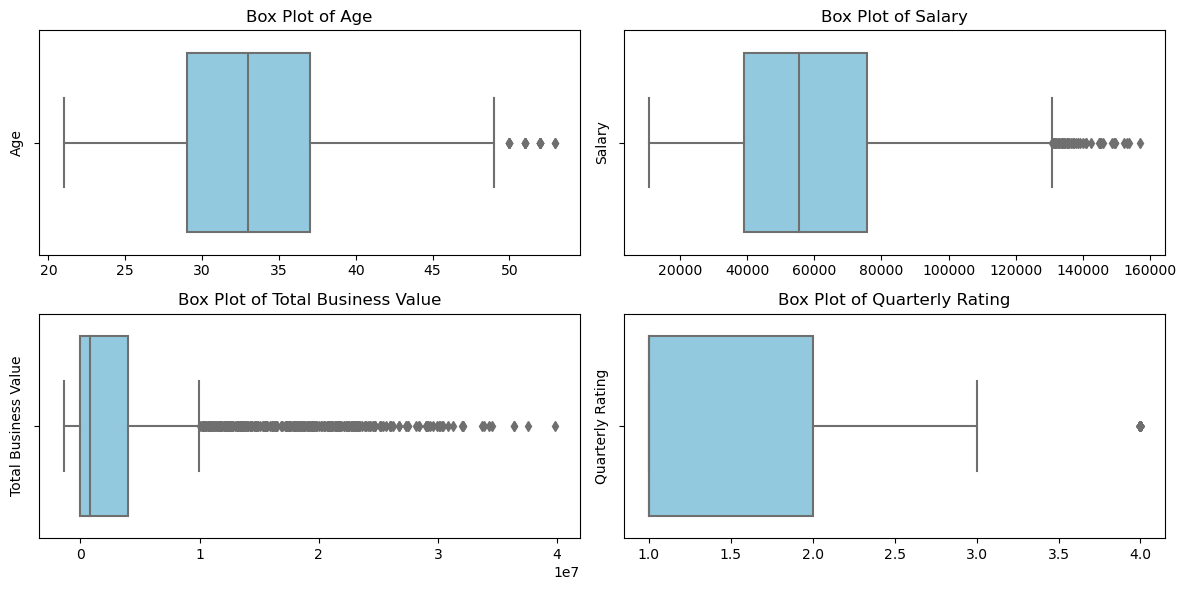

In [32]:
plt.figure(figsize=(12, 6))

numerical_cols = ['Age', 'Salary', 'Total Business Value', 'Quarterly Rating']

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, data=final_data, orient='vertical', color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [37]:
def remove_outliers_zscore(df, cols, threshold=3):
    for col in cols:
        # Calculate the Z-scores for each data point in the column
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        
        # Remove data points with Z-scores greater than the threshold
        df = df[z_scores < threshold]
    
    return df

# Remove outliers from the numerical columns using Z-score method with default threshold of 3
final_data_cleaned_zscore = remove_outliers_zscore(final_data, numerical_cols)

# Display the cleaned DataFrame
print(final_data_cleaned_zscore)

      Total Business Value  Emp_ID  Age  Gender City Education_Level  Salary  \
0                  1715580       1   28    Male  C23          Master   57387   
1                        0       2   31    Male   C7          Master   67016   
2                   350000       4   43    Male  C13          Master   65603   
3                   120360       5   29    Male   C9         College   46368   
4                  1265000       6   31  Female  C11        Bachelor   78728   
...                    ...     ...  ...     ...  ...             ...     ...   
2375                     0    2782   26    Male  C19        Bachelor   29582   
2377                     0    2785   34  Female   C9         College   12105   
2378               2815090    2786   45    Male  C19         College   35370   
2379                977830    2787   28  Female  C20          Master   69498   
2380               2298240    2788   30    Male  C27          Master   70254   

     Dateofjoining LastWorkingDate  Joi

In [227]:
#as we can see a new caloumn is created to see if the employee is still working or not

Text(0.5, 1.0, 'Count of Employees by Employment Status')

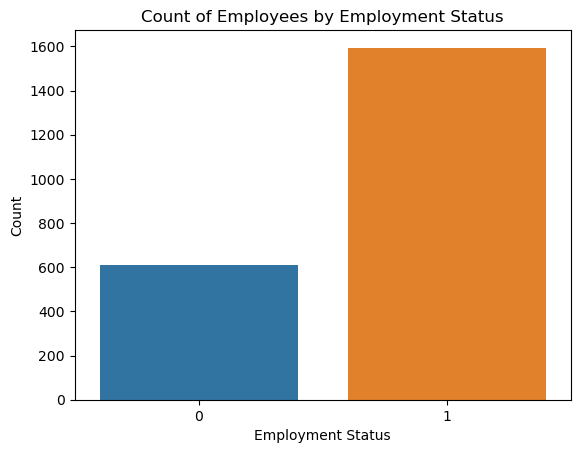

In [41]:
sns.countplot(x='working', data=final_data_cleaned_zscore)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Count of Employees by Employment Status')

In [229]:
#0 indicates not working
#1 indicates still working 

In [44]:
from dateutil.relativedelta import relativedelta
from datetime import datetime

In [45]:
def TotalTime(x,y):
    if pd.isnull(y):
        y = datetime.today().strftime('%Y-%m-%d')
    x_time = datetime.strptime(x, '%Y-%m-%d')
    y_time = datetime.strptime(y, '%Y-%m-%d')
    td=relativedelta(y_time,x_time)
    return td.years

In [51]:
final_data_cleaned_zscore['TotalWorkYears']=final_data_cleaned_zscore.apply(lambda x: TotalTime(x.Dateofjoining, x.LastWorkingDate), axis=1)

In [52]:
final_data_cleaned_zscore.head()

,Total Business Value,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Quarterly Rating,working,TotalWorkYears
0,1715580,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,2,1,0
1,0,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,1,0,6
2,350000,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,1,1,0
3,120360,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,1,1,0
4,1265000,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,2,0,6


(-1.099999451705928,
 1.0999992478579717,
 -1.099999376325365,
 1.0999999702764527)

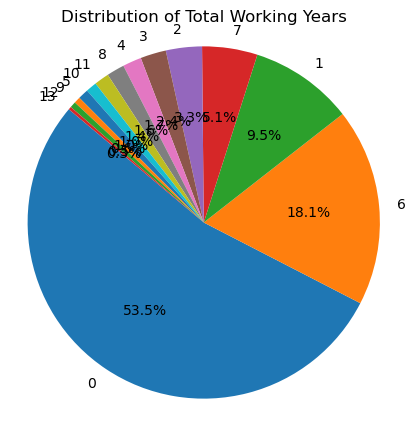

In [53]:
total_working_years_counts = final_data_cleaned_zscore['TotalWorkYears'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(total_working_years_counts, labels=total_working_years_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Working Years')
plt.axis('equal')

C:\Users\neera\AppData\Local\Temp\ipykernel_8740\1843532737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = final_data_cleaned_zscore.corr()


<Axes: >

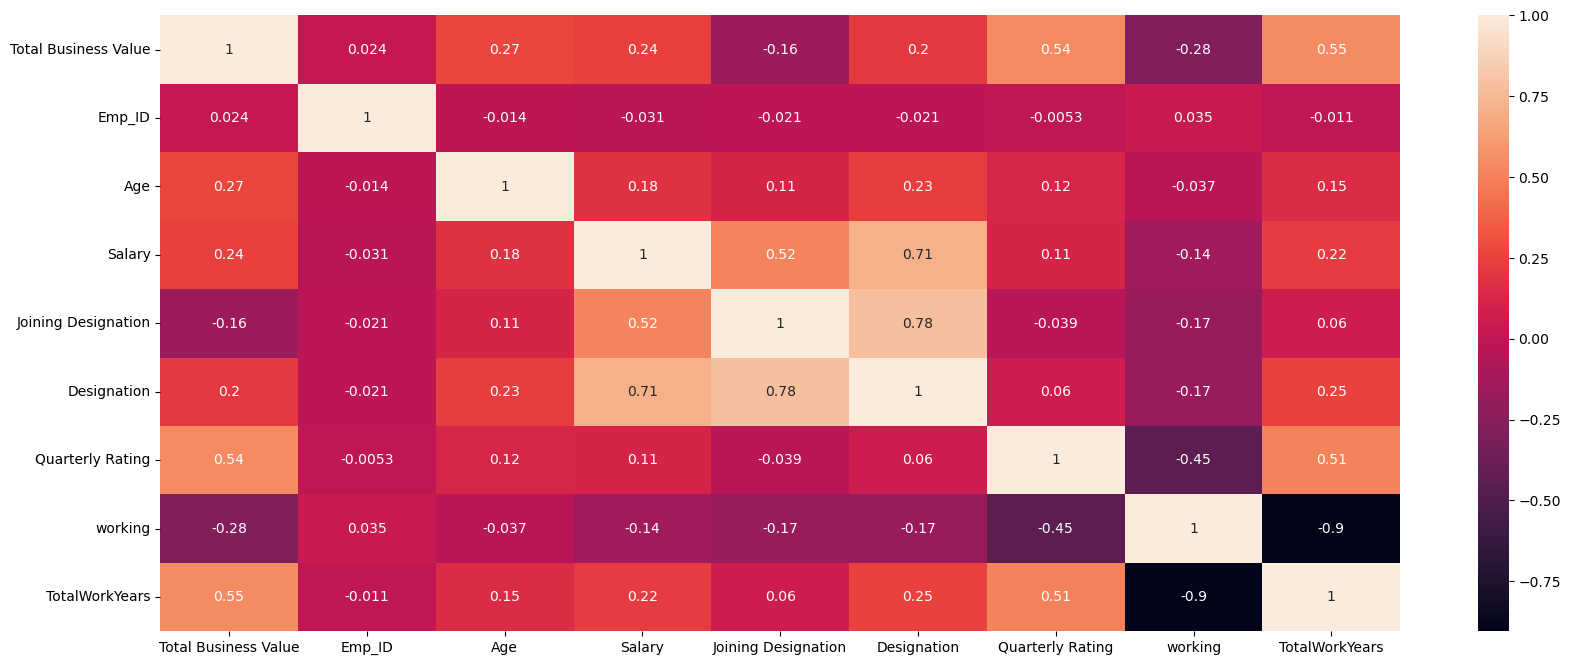

In [54]:
corr = final_data_cleaned_zscore.corr()

plt.figure(figsize = (20,8))
sns.heatmap(corr,annot = True,cmap = 'rocket')

In [55]:
final_data_cleaned_zscore.describe()

,Total Business Value,Emp_ID,Age,Salary,Joining Designation,Designation,Quarterly Rating,working,TotalWorkYears
count,2.206000e+03,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000
mean,2.583364e+06,1393.532185,33.363101,57217.822756,1.827743,2.033092,1.286945,0.722575,2.325476
std,4.431948e+06,805.739431,5.746345,26689.511888,0.835315,0.900638,0.585294,0.447830,3.157994
min,-1.385530e+06,1.000000,21.000000,10747.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000e+00,691.250000,29.000000,38206.500000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,5.805550e+05,1398.500000,33.000000,53923.000000,2.000000,2.000000,1.000000,1.000000,0.000000
75%,2.852142e+06,2091.750000,37.000000,72493.750000,2.000000,3.000000,1.000000,1.000000,6.000000
max,2.250718e+07,2788.000000,51.000000,140833.000000,5.000000,5.000000,3.000000,1.000000,13.000000


In [56]:
final_data_cleaned_zscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2206 entries, 0 to 2380
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Total Business Value  2206 non-null   int64 
 1   Emp_ID                2206 non-null   int64 
 2   Age                   2206 non-null   int64 
 3   Gender                2206 non-null   object
 4   City                  2206 non-null   object
 5   Education_Level       2206 non-null   object
 6   Salary                2206 non-null   int64 
 7   Dateofjoining         2206 non-null   object
 8   LastWorkingDate       1594 non-null   object
 9   Joining Designation   2206 non-null   int64 
 10  Designation           2206 non-null   int64 
 11  Quarterly Rating      2206 non-null   int64 
 12  working               2206 non-null   int32 
 13  TotalWorkYears        2206 non-null   int64 
dtypes: int32(1), int64(8), object(5)
memory usage: 314.4+ KB


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [58]:
df_encoded = pd.get_dummies(final_data_cleaned_zscore, columns=['Gender', 'City', 'Education_Level'])

In [59]:
df_encoded.head()

,Total Business Value,Emp_ID,Age,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Quarterly Rating,working,...,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,1715580,1,28,57387,2015-12-24,2016-03-11,1,1,2,1,...,0,0,0,0,0,0,0,0,0,1
1,0,2,31,67016,2017-11-06,NaN,2,2,1,0,...,0,0,0,0,1,0,0,0,0,1
2,350000,4,43,65603,2016-12-07,2017-04-27,2,2,1,1,...,0,0,0,0,0,0,0,0,0,1
3,120360,5,29,46368,2016-01-09,2016-03-07,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
4,1265000,6,31,78728,2017-07-31,NaN,3,3,2,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Salary', 'Total Business Value', 'Quarterly Rating']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [61]:
df_encoded.head()

,Total Business Value,Emp_ID,Age,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Quarterly Rating,working,...,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,-0.195846,1,-0.933518,0.006340,2015-12-24,2016-03-11,1,1,1.218563,1,...,0,0,0,0,0,0,0,0,0,1
1,-0.583028,2,-0.411329,0.367200,2017-11-06,NaN,2,2,-0.490369,0,...,0,0,0,0,1,0,0,0,0,1
2,-0.504038,4,1.677429,0.314246,2016-12-07,2017-04-27,2,2,-0.490369,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.555865,5,-0.759455,-0.406612,2016-01-09,2016-03-07,1,1,-0.490369,1,...,0,0,0,0,0,0,1,0,1,0
4,-0.297536,6,-0.411329,0.806124,2017-07-31,NaN,3,3,1.218563,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [63]:
y = df_encoded['working'] #target 

In [64]:
X = df_encoded.drop(['working', 'Emp_ID', 'Dateofjoining', 'LastWorkingDate'], axis=1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)


In [75]:
# Evaluate Logistic Regression model
log_reg_accuracy = accuracy_score(y_test, log_reg_preds)
log_reg_precision = precision_score(y_test, log_reg_preds)
log_reg_recall = recall_score(y_test, log_reg_preds)
log_reg_f1 = f1_score(y_test, log_reg_preds)
log_reg_roc_auc = roc_auc_score(y_test, log_reg_preds)

In [76]:
# 2. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [77]:
# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)
rf_roc_auc = roc_auc_score(y_test, rf_preds)

In [78]:
# 3. Support Vector Classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

In [79]:
# Evaluate Support Vector Classifier
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_precision = precision_score(y_test, svm_preds)
svm_recall = recall_score(y_test, svm_preds)
svm_f1 = f1_score(y_test, svm_preds)
svm_roc_auc = roc_auc_score(y_test, svm_preds)

In [80]:
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine'],
    'Accuracy': [log_reg_accuracy, rf_accuracy, svm_accuracy],
    'Precision': [log_reg_precision, rf_precision, svm_precision],
    'Recall': [log_reg_recall, rf_recall, svm_recall],
    'F1 Score': [log_reg_f1, rf_f1, svm_f1],
    'ROC AUC Score': [log_reg_roc_auc, rf_roc_auc, svm_roc_auc]
}

metrics_df = pd.DataFrame(metrics)
metrics_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Logistic Regression,0.990950,1.0,0.987013,0.993464,0.993506
1,Random Forest,0.990950,1.0,0.987013,0.993464,0.993506
2,Support Vector Machine,0.993213,1.0,0.990260,0.995106,0.995130


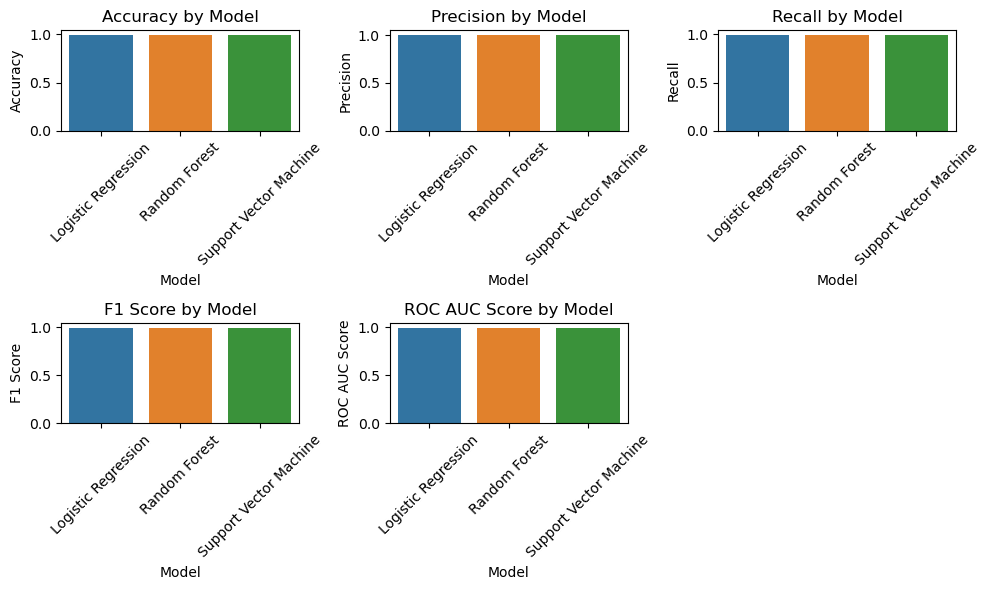

In [83]:
plt.figure(figsize=(10, 6))

# Loop through each metric and plot
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'], 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Model', y=metric, data=metrics_df)
    plt.title(f'{metric} by Model')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [84]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


In [85]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [86]:
# Define the models
models = [log_reg, rf, svm]

# Define lists to store mean and standard deviation of each metric
mean_accuracy = []
std_accuracy = []

# Iterate over models
for model in models:
    # Perform cross-validation
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    
    # Store mean and standard deviation of accuracy
    mean_accuracy.append(cv_results.mean())
    std_accuracy.append(cv_results.std())


In [87]:
# Display mean and standard deviation of accuracy for each model
for i, model_name in enumerate(['Logistic Regression', 'Random Forest', 'Support Vector Machine']):
    print(f"{model_name}: Mean Accuracy: {mean_accuracy[i]}, Standard Deviation: {std_accuracy[i]}")


Logistic Regression: Mean Accuracy: 0.9960323847540561, Standard Deviation: 0.004239409420597944
Random Forest: Mean Accuracy: 0.9926329513262943, Standard Deviation: 0.003840782199703801
Support Vector Machine: Mean Accuracy: 0.9965989569920165, Standard Deviation: 0.004163220858990827


In [89]:
# Define the evaluation metrics to consider
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']

# Define the mean performance metrics for each model
mean_metrics = {
    'Logistic Regression': [0.9931744716121009, log_reg_precision, log_reg_recall, log_reg_f1, log_reg_roc_auc],
    'Random Forest': [0.992649537228899, rf_precision, rf_recall, rf_f1, rf_roc_auc],
    'Support Vector Machine': [0.9942243403785053, svm_precision, svm_recall, svm_f1, svm_roc_auc]
}

# Display the mean performance metrics for each model
print("Mean Performance Metrics for Each Model:")
for model_name, metrics in mean_metrics.items():
    print(f"{model_name}:")
    for i, metric_value in enumerate(metrics):
        print(f"{evaluation_metrics[i]}: {metric_value}")
    print()
best_model = max(mean_metrics, key=lambda k: mean_metrics[k][0])
print(f"Best Model: {best_model}")

Mean Performance Metrics for Each Model:
Logistic Regression:
Accuracy: 0.9931744716121009
Precision: 1.0
Recall: 0.987012987012987
F1 Score: 0.9934640522875817
ROC AUC Score: 0.9935064935064934

Random Forest:
Accuracy: 0.992649537228899
Precision: 1.0
Recall: 0.987012987012987
F1 Score: 0.9934640522875817
ROC AUC Score: 0.9935064935064934

Support Vector Machine:
Accuracy: 0.9942243403785053
Precision: 1.0
Recall: 0.9902597402597403
F1 Score: 0.9951060358890702
ROC AUC Score: 0.9951298701298701

Best Model: Support Vector Machine


***If you prioritize high precision (minimizing false positives) and balanced performance across all metrics, Logistic Regression might be a better choice as it has slightly higher precision and recall.
If you prefer a model with perfect precision (no false positives) and slightly lower recall, Random Forest might be preferred.***